In [117]:
from scipy.optimize import minimize, rosen, rosen_der
import math
import numpy as np

In [118]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
         {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
         {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,constraints=cons)

In [119]:
print res.x

[ 1.4  1.7]


In [120]:
print res.message

Optimization terminated successfully.


In [121]:
fun = lambda x: (x[0]+1)**2 
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] + 2},
         {'type': 'ineq', 'fun': lambda x: -x[0] + 6},
         {'type': 'ineq', 'fun': lambda x: -x[0] + 2})
bnds = ((0, None),(0, None))
res = minimize(fun, (2,0), method='SLSQP')
# 最优解
print res.x

[-1.  0.]


In [248]:
b = np.array([1,1]).reshape([1,2])
fun = lambda x: ((np.array(x).reshape([2,1])+b)**2).sum() 
bnds = ((-3, None),(0, None))
res = minimize(fun, (2,0),bounds=bnds, method='L-BFGS-B')
# 最优解
print res.x

[-1.  0.]


In [258]:
b = np.array([1.,1.]).reshape([1,2])
# x = np.array([2.,0.]).reshape([2,1])
def ab_sum(x):
    a = np.array(x).reshape([2,1])
    return ((a+b)**2).sum()
# fun = lambda x: ((np.array(x).reshape([2,1])+b)**2).sum()  
# fun = ab_sum(b)
bnds = ((-3, None),(0, None))
res = minimize(ab_sum, (2.,0.),bounds=bnds, method='L-BFGS-B')
# 最优解
print res.x

[-1.  0.]


In [122]:
# 目标函数值
print res.fun

0.0


In [123]:
print res.jac

[  1.49011612e-08   0.00000000e+00   0.00000000e+00]


In [124]:
print res.nfev

9


In [125]:
print res.njev

2


In [126]:
# 迭代次数
print res.nit

2


In [149]:
b0=np.array([ 0.7817,0.169,  -0.1636, -0.8591,  0.775,   0.4356, -0.2249,  0.4531, -1.3363, -0.6339])
b1=np.array([0.7956,  0.144,  -0.1468, -0.8431,  0.7774,  0.4175, -0.0889,  0.4272, -1.3341,-0.6554])
y=np.array([False, False,  True,  True, False, False,  True, False,  True,  True])
fun = lambda x: sum(np.log(1+ np.exp(-(x[0]-b0)))+np.log(1+ np.exp(-(x[1]-b1)))-(1-y)*np.log((1+ np.exp(-(x[0]-b0)))*(1+ np.exp(-(x[1]-b1)))-1))
res = minimize(fun, (0.8319,0.8839), method='SLSQP')
print res.x
print res.nit
print 0.5<1.0/ (1.0 + np.exp(-(res.x[0]-b0)))/ (1.0 + np.exp(-(res.x[1]-b1)))

[ 0.69343122  0.88168378]
5
[False False  True  True False False  True False  True  True]


In [139]:
a = np.array([[[0.8319]],[[0.8839]]])
a[0]-b0

array([[ 0.0502,  0.6629,  0.9955,  1.691 ,  0.0569,  0.3963,  1.0568,
         0.3788,  2.1682,  1.4658]])

In [134]:
print res.nit

5


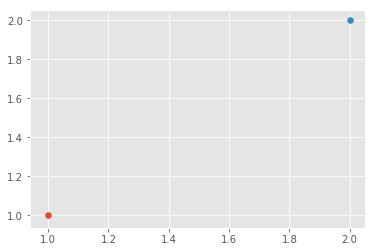

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4
plt.style.use('ggplot')
plt.scatter(1,1)
plt.scatter(2,2)

In [226]:
b0=np.array([ 0.7817,0.169,  -0.1636, -0.8591,  0.775,   0.4356, -0.2249,  0.4531, -1.3363, -0.6339])
b1=np.array([0.7956,  0.144,  -0.1468, -0.8431,  0.7774,  0.4175, -0.0889,  0.4272, -1.3341,-0.6554])
y=np.array([[False, False,  True,  True, False, False,  True, False,  True,  True],[False, False,  True,  True, False, False,  True, False,  True,  True]])
# fun = lambda x: sum(np.log(1+ np.exp(-(np.array([[x[0]],[x[1]]])-np.array([[x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13]]]))))+np.log(1+ np.exp(-(x[1]-b1)))-(1-y)*np.log((1+ np.exp(-(x[0]-b0)))*(1+ np.exp(-(x[1]-b1)))-1))
# fun = lambda x: (np.array([[x[0],x[1]]])-np.array([[x[2]],[x[3]]])).sum()**2
# b0 = (0.7817,0.169,  -0.1636, -0.8591,  0.775,   0.4356, -0.2249,  0.4531, -1.3363, -0.6339)
fun = lambda x: -(1-y)*(np.log((1+ np.exp(-(np.array([[x[0]],[x[1]]])-np.array([[x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13]]]))))*(1+ np.exp(-(np.array([[x[2]],[x[3]]])-np.array([[x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23]]]))))-1))
a0 = np.array([0.8319,0.8319])
a1 = np.array([0.8839,0.8839])
res = minimize(fun, (a0,a1,b0,b1), method='SLSQP')
print res.x
print res.fun
print res.nit


ValueError: setting an array element with a sequence.

In [217]:
(np.array([[3,4]])-np.array([[3],[4]])).sum()

0

In [245]:
n_stu = 2
n_items = 2
start1 = n_stu
start2 = n_stu*2
start3 = n_stu*2+n_items
b0=np.array([ 0.7817,0.169])
b1=np.array([0.7956,0.144])
y=np.array([[False, False],[False, False]])
bnds = ((-3, 3), (-3, 3))
# fun = lambda x: sum(np.log(1+ np.exp(-(np.array([[x[0]],[x[1]]])-np.array([[x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13]]]))))+np.log(1+ np.exp(-(x[1]-b1)))-(1-y)*np.log((1+ np.exp(-(x[0]-b0)))*(1+ np.exp(-(x[1]-b1)))-1))
# fun = lambda x: (np.array([[x[0],x[1]]])-np.array([[x[2]],[x[3]]])).sum()**2
# b0 = (0.7817,0.169,  -0.1636, -0.8591,  0.775,   0.4356, -0.2249,  0.4531, -1.3363, -0.6339)
# fun = lambda x: (np.log((1+ np.exp(-(np.array([[ii] for ii in x[:start1]])-np.array([[x[start2:start3]]])))))+np.log(1+ np.exp(-(np.array([[x[2]],[x[3]]])-np.array([[x[6:8]]]))))-(1-y)*(np.log((1+ np.exp(-(np.array([[x[0]],[x[1]]])-np.array([[x[4:6]]]))))*(1+ np.exp(-(np.array([[x[2]],[x[3]]])-np.array([[x[6:8]]]))))-1))).sum()
a0 = np.array([0.8319,0.8319])
a1 = np.array([0.8839,0.8839])

fun = lambda x: (np.log(1+ np.exp(-(np.array([[ii] for ii in x[:start1]])-np.array([[x[start2:start3]]]))))+np.log(1+ np.exp(-(np.array([[ii] for ii in x[start1:start2]])-np.array([[x[start3:]]]))))-(1-y)*np.log((1+ np.exp(-(np.array([[ii] for ii in x[:start1]])-np.array([[x[start2:start3]]]))))*(1+ np.exp(-(np.array([[ii] for ii in x[start1:start2]])-np.array([[x[start3:]]]))))-1)).sum()/n_items
# res = minimize(fun, (a0,a1,b0,b1), bounds=bnds,method='L-BFGS-B')
res = minimize(fun, (a0,a1,b0,b1), method='SLSQP')
print res.x
print res.fun
print res.nit

[-3.0794 -3.0794 -2.8829 -2.8829  3.8722  4.9012  3.8277  4.6455]
1.34679230879e-06
19


In [235]:
a = np.array([[ii] for ii in range(3)])

In [236]:
a

array([[0],
       [1],
       [2]])